## Data 3550 Mid-Term Project
### Ayman Boules, Katherine Simon, Nicholas Sartino, Sammi Hamdan

## 1. Import the required packages

In [1]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from numpy import arange

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

import statsmodels.api as sm

pd.set_option('display.max_columns',200) #allows for up to 200 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

# trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## 2. Import the dataset DF_AH.csv and perform Exploratory Data Analysis (15 points)
* The dataset DF_AH.csv is exported from the data data preprocessing notebook after we removed the outliers, and doing some feature engineering. This dataset contains 92 variables including the target variable.
* Do the exploratory data analysis to gain better insights on the data


In [2]:
df_ah = pd.read_csv('Dataset/DF_AH.csv')

In [3]:
df_ah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2925 non-null   int64  
 1   MS SubClass      2925 non-null   int64  
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2925 non-null   float64
 4   Lot Area         2925 non-null   int64  
 5   Street           2925 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2925 non-null   object 
 8   Land Contour     2925 non-null   object 
 9   Utilities        2925 non-null   object 
 10  Lot Config       2925 non-null   object 
 11  Land Slope       2925 non-null   object 
 12  Neighborhood     2925 non-null   object 
 13  Condition 1      2925 non-null   object 
 14  Condition 2      2925 non-null   object 
 15  Bldg Type        2925 non-null   object 
 16  House Style      2925 non-null   object 
 17  Overall Qual  

## Exploratory Data Analysis

In [3]:
# Basic Stats
df_ah.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
count,2.925000e+03,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2902.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.000000,2924.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2766.000000,2924.000000,2924.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,7.143948e+08,57.410256,57.471453,10115.260171,6.090256,5.563077,1971.323761,1984.254017,100.973122,438.720342,49.790427,559.056410,1047.567179,1156.227692,334.358632,4.684786,1495.271111,0.430575,0.060534,1.565470,0.378803,2.854017,1.044444,6.436581,0.597265,1978.110268,1.765732,472.090287,93.463248,47.305641,23.050940,2.596923,16.029402,1.893333,44.909744,6.218803,2007.791111,180447.728547,2542.838291,1490.586325,88.982906,2.215116,0.972991,0.945983,0.701197,0.003761,0.464274,0.250598,0.916923
std,1.887292e+08,42.663172,33.093889,7801.349001,1.404285,1.111993,30.246052,20.856787,176.451831,439.251044,169.274143,439.585774,422.809176,378.341327,426.378830,46.349684,489.694709,0.524105,0.244183,0.551925,0.502486,0.827591,0.214251,1.559522,0.645297,25.527487,0.760045,213.922342,126.040109,66.895903,64.186809,25.162589,56.131397,32.964272,472.237990,2.712133,1.317483,78532.499818,766.279396,487.192027,107.497846,0.804046,0.162136,0.226090,0.457812,0.061219,0.498807,0.433432,0.276046
min,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,334.000000,334.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.284770e+08,20.000000,43.000000,7440.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,2004.000000,1120.000000,0.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.354532e+08,50.000000,63.000000,9430.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,465.000000,990.000000,1083.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,2452.000000,1440.000000,50.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,9.071811e+08,70.000000,78.000000,11520.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,801.000000,1300.000000,1383.000000,703.000000,0.000000,1740.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,

In [4]:
# Preview rows
df_ah.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,No,NaN,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,No,Gar2,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,No,NaN,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1


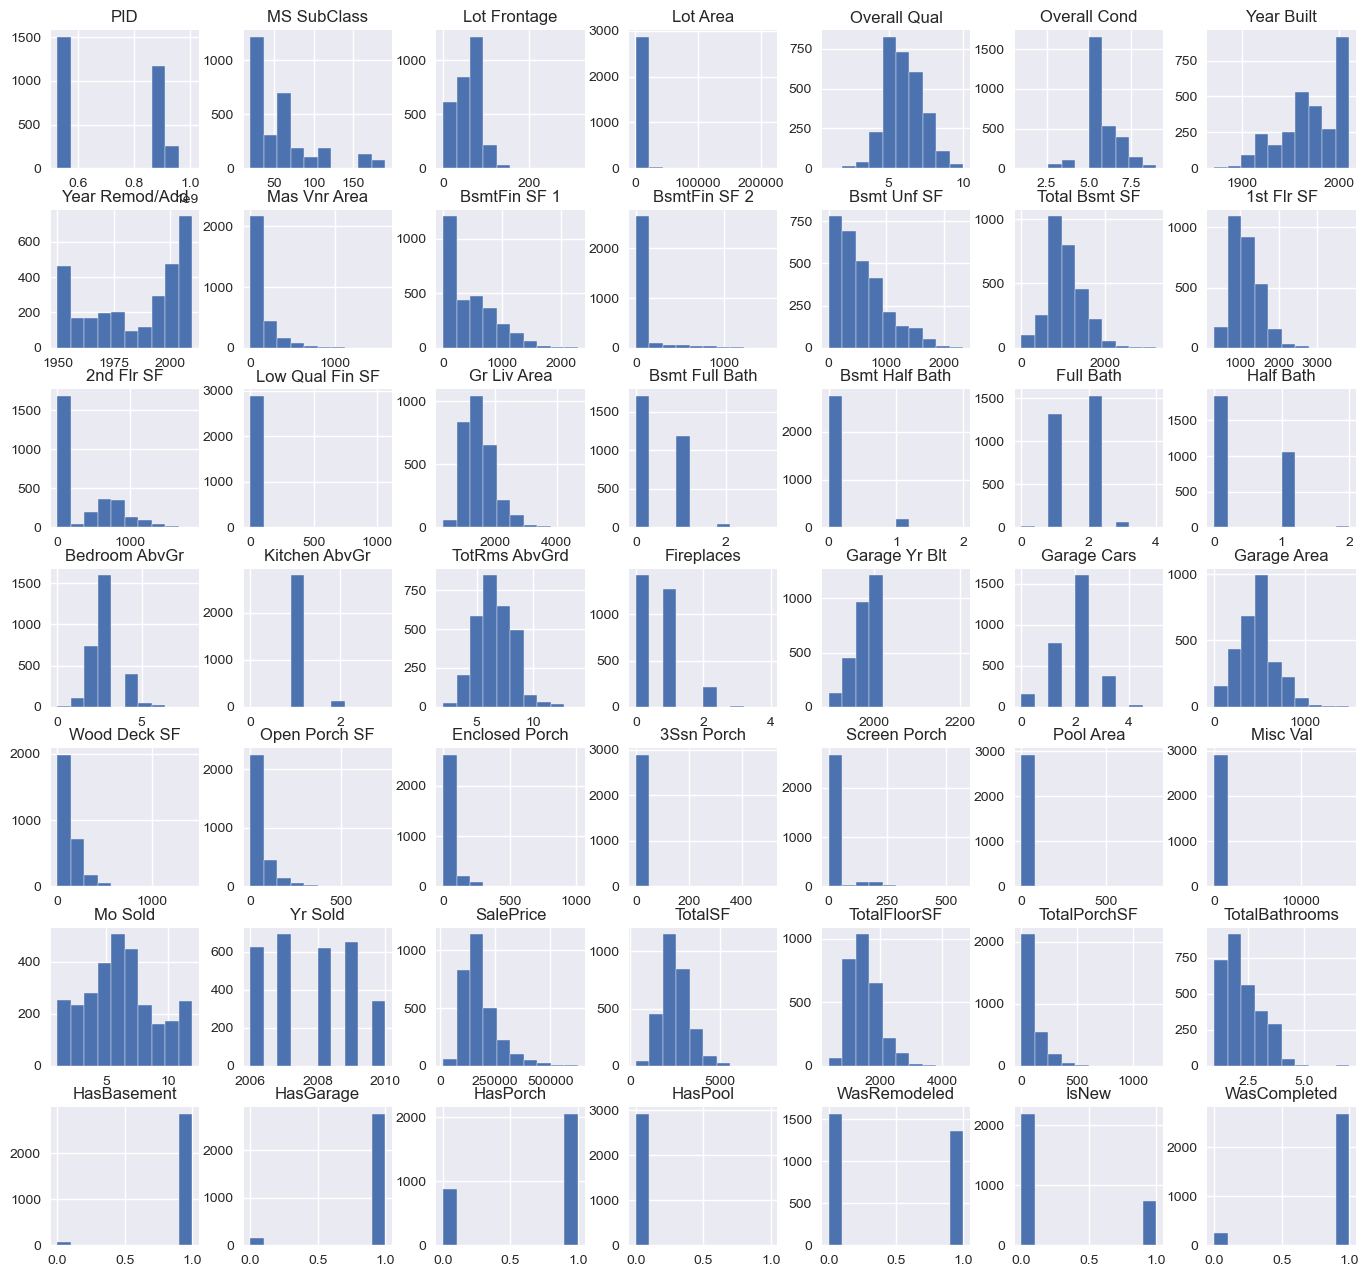

In [6]:
# Histograms
df_ah.hist(figsize=(15, 15))
plt.show()

## 3. Perform additional Feature Engineering(10 points)

1) Identify the unique number of foundation types

In [5]:
unique_entries_count = df_ah['Foundation'].nunique()
print("Number of unique entries in Foundation:", unique_entries_count)

Number of unique entries in Foundation: 6


2) Create the dummy variable for the foundation type

In [6]:
# Create dummy variables for the column 'Foundation'

# Create dummy variables
dummy_variables = pd.get_dummies(df_ah['Foundation'], prefix='dummy')

# Concatenate the dummy variables with the original DataFrame
df_ah = pd.concat([df_ah, dummy_variables], axis=1)

# Drop the original column if needed
df_ah = df_ah.drop('Foundation', axis=1)

# Display the resulting DataFrame
df_ah.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,dummy_BrkTil,dummy_CBlock,dummy_PConc,dummy_Slab,dummy_Stone,dummy_Wood
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,No,NaN,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1,0,1,0,0,0,0
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1,0,1,0,0,0,0
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,No,Gar2,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1,0,1,0,0,0,0
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,No,NaN,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1,0,1,0,0,0,0
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1,0,0,1,0,0,0


3) Identify all the unique neighborhoods

In [7]:
unique_entries_count = df_ah['Neighborhood'].nunique()
print("Number of unique entries in Neighborhood:", unique_entries_count)

Number of unique entries in Neighborhood: 28


4) Create the dummy variable for neighborhood

In [8]:
# Create dummy variables for the column 'Foundation'

# Create dummy variables
dummy_variables = pd.get_dummies(df_ah['Neighborhood'], prefix='dummy')

# Concatenate the dummy variables with the original DataFrame
df_ah = pd.concat([df_ah, dummy_variables], axis=1)

# Drop the original column if needed
df_ah = df_ah.drop('Neighborhood', axis=1)

# Display the resulting DataFrame
df_ah.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,dummy_BrkTil,dummy_CBlock,dummy_PConc,dummy_Slab,dummy_Stone,dummy_Wood,dummy_Blmngtn,dummy_Blueste,dummy_BrDale,dummy_BrkSide,dummy_ClearCr,dummy_CollgCr,dummy_Crawfor,dummy_Edwards,dummy_Gilbert,dummy_Greens,dummy_GrnHill,dummy_IDOTRR,dummy_Landmrk,dummy_MeadowV,dummy_Mitchel,dummy_NAmes,dummy_NPkVill,dummy_NWAmes,dummy_NoRidge,dummy_NridgHt,dummy_OldTown,dummy_SWISU,dummy_Sawyer,dummy_SawyerW,dummy_Somerst,dummy_StoneBr,dummy_Timber,dummy_Veenker
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,No,NaN,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,No,Gar2,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,No,NaN,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


5) Look at the DF_AH.info() and drop all the variables that have Non-Null count >= 2500.

In [9]:
# Display information about the DataFrame
df_ah.info()

# Create a new DataFrame with columns having non-null counts >= 2500
min_non_null_count = 2500
filtered_df = df_ah.dropna(axis=1, thresh=min_non_null_count)

# Display the resulting DataFrame
filtered_df.head(100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 124 entries, PID to dummy_Veenker
dtypes: float64(13), int64(36), object(41), uint8(34)
memory usage: 2.1+ MB


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,dummy_BrkTil,dummy_CBlock,dummy_PConc,dummy_Slab,dummy_Stone,dummy_Wood,dummy_Blmngtn,dummy_Blueste,dummy_BrDale,dummy_BrkSide,dummy_ClearCr,dummy_CollgCr,dummy_Crawfor,dummy_Edwards,dummy_Gilbert,dummy_Greens,dummy_GrnHill,dummy_IDOTRR,dummy_Landmrk,dummy_MeadowV,dummy_Mitchel,dummy_NAmes,dummy_NPkVill,dummy_NWAmes,dummy_NoRidge,dummy_NridgHt,dummy_OldTown,dummy_SWISU,dummy_Sawyer,dummy_SawyerW,dummy_Somerst,dummy_StoneBr,dummy_Timber,dummy_Veenker
0,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,No,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,MnPrv,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,No,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,MnPrv,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No,0,6,2010,WD,Normal,195500,2530.0,1604,36,2.5,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,527127150,120,

## 4.  Impute the data (10 points)

1) Check whether each of the variables have missing values

In [10]:
# Find columns with missing values and their counts
missing_counts = filtered_df.isnull().sum()

# Filter and print columns with missing values
columns_with_missing_values = missing_counts[missing_counts > 0]
print(columns_with_missing_values)

Mas Vnr Type       23
Mas Vnr Area       23
Bsmt Qual          79
Bsmt Cond          79
Bsmt Exposure      82
BsmtFin Type 1     79
BsmtFin Type 2     80
Electrical          1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
TotalBathrooms      1
dtype: int64


2) Impute the missing values using the appropriate method and explain why you use that method?

### We need to decide which variables to drop or fill:

* 'Alley' looks like almost completely empty, so we should drop that one
* 'Mas Vnr Type' and 'Fireplace Qu' are both pretty empty, so I think we should drop those as well.  'Mas Vnr Area' is probably useless without the type, so we can also drop it.
* There are seven variables related to 'basement' that look good enough for us to fill in somehow
* There are seven variables related to 'garage' that look good enough for us to fill in somehow
* 'Pool QC' and 'Misc Feature' look like they can be dropped
* 'Electrical' and 'TotalBathrooms' are the only other variables with missing values, and they are only missing 1, so we can keep them and fill with some method.




3) Look at the data and for remaining categorical variable, create the dummy variable, or drop the variable. Explain your reasoning.

In [11]:
# Loop through columns and create dummy variables for object type columns
for column_name, column in filtered_df.items():
    if column.dtypes == 'object':
        dummy_variables = pd.get_dummies(column, prefix=column_name)
        filtered_df = pd.concat([filtered_df, dummy_variables], axis=1)
        filtered_df = filtered_df.drop(column_name, axis=1)

In [12]:
# Loop through columns and fill NaN values with the median value for each column

for column_name, column in filtered_df.items():
    if column.isna().any():  # Check if the column has any NaN values
        median = column.median()
        filtered_df[column_name].fillna(median, inplace=True)

In [13]:
#  Show dataframe to confirm dummies created successfully.
filtered_df.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,dummy_BrkTil,dummy_CBlock,dummy_PConc,dummy_Slab,dummy_Stone,dummy_Wood,dummy_Blmngtn,dummy_Blueste,dummy_BrDale,dummy_BrkSide,dummy_ClearCr,dummy_CollgCr,dummy_Crawfor,dummy_Edwards,dummy_Gilbert,dummy_Greens,dummy_GrnHill,dummy_IDOTRR,dummy_Landmrk,dummy_MeadowV,dummy_Mitchel,dummy_NAmes,dummy_NPkVill,dummy_NWAmes,dummy_NoRidge,dummy_NridgHt,dummy_OldTown,dummy_SWISU,dummy_Sawyer,dummy_SawyerW,dummy_Somerst,dummy_StoneBr,dummy_Timber,dummy_Veenker,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,...,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,

In [14]:
# Check for NaN values after imputing the data

# Find columns with missing values and their counts
missing_counts = filtered_df.isnull().sum()

# Filter and print columns with missing values
columns_with_missing_values = missing_counts[missing_counts > 0]
print(columns_with_missing_values)

Series([], dtype: int64)


## 5. Create the train/test data and scaling (5 points)

1) Split the data into training and test set with training on 80 percent.

In [15]:
X = filtered_df.drop('SalePrice', axis = 1) #keep features only for X
y = filtered_df['SalePrice'] #keep target variable only for y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

2) Standardize the data using standard scaler, then build the regression models using the scaled data.

In [16]:
sc = StandardScaler()
# fit the data i.e. calculate the mean and sd of each column of X_train
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

# 6.  Build the Multiple Regression Model

## Build Initial Model

In [17]:
X_reg = sm.add_constant(X_train_sc) # adding a constant
reg1 = sm.OLS(np.asarray(y_train), X_reg).fit() 
pred = reg1.predict(X_reg) 

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     129.9
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:28:00   Log-Likelihood:                -26344.
No. Observations:                2340   AIC:                         5.320e+04
Df Residuals:                    2084   BIC:                         5.467e+04
Df Model:                         255                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.795e+05    410.772    437.051      0.000    1.79e+05     1.8e+05
PID                     1505.8883   1379.464      1.092      0.275   -1199.382    4211.159
MS SubClass            -2418.5110   2147.725     -1.126      0.260   -6630.421    1793.399
Lot Frontage             406.3761    522.062      0.778      0.436    -617.441    1430.193
Lot Area                6814.8537    668.888     10.188      0.000    5503.096    8126.612
Overall Qual            9456.1221    944.746     10.009      0.000    7603.379    1.13e+04
Overall Cond            6369.0965    646.773      9.848      0.000    5100.709    7637.484
Year Built              8653.6023   1639.310      5.279      0.000    5438.747    1.19e+04
Year Remod/Add          1124.6841    806.806      1.394      0.163    -457.545    2706.913
Mas Vnr Area            4316.2910    707.649      6.099      0.000    2928.519    5704.063
BsmtFin SF 1            6696.5028    611.705     10.947      0.000    5496.887    7896.119
BsmtFin SF 2            1522.0057    788.470      1.930      0.054     -24.264    3068.276
Bsmt Unf SF            -1917.8511    531.808     -3.606      0.000   -2960.781    -874.921
Total Bsmt SF           5594.9128    778.551      7.186      0.000    4068.095    7121.731
1st Flr SF              2214.3051    966.810      2.290      0.022     318.291    4110.319
2nd Flr SF              7772.4113    881.206      8.820      0.000    6044.275    9500.547
Low Qual Fin SF          480.4924    503.332      0.955      0.340    -506.593    1467.578
Gr Liv Area             8449.6491    482.650     17.507      0.000    7503.124    9396.175
Bsmt Full Bath         -1.239e+04   7869.971     -1.575      0.115   -2.78e+04    3039.953
Bsmt Half Bath         -3532.0490   1915.923     -1.844      0.065   -7289.372     225.274
Full Bath              -1.242e+04   8300.208     -1.496      0.135   -2.87e+04    3859.014
Half Bath              -5104.8431   3786.030     -1.348      0.178   -1.25e+04    2319.951
Bedroom AbvGr          -2820.8131    744.355     -3.790      0.000   -4280.570   -1361.056
Kitchen AbvGr          -2187.7606    821.827     -2.662      0.008   -3799.448    -576.074
TotRms AbvGrd           -135.6114    962.679     -0.141      0.888   -2023.523    1752.301
Fireplaces              1554.2116    576.121      2.698      0.007     424.379    2684.044
Garage Yr Blt            464.9852    925.254      0.503      0.615   -1349.532    2279.503
Garage Cars             3111.0731   1153.582      2.697      0.007     848.780    5373.366
Garage Area             2841.1128   1113.739      2.551      0.011     656.957    5025.269
Wood Deck SF            1749.6551    497.526      3.517      0.000     773.955    2725.355
Open Porch SF           -183.4988    442.175     -0.415      0.678   -1050.650  

## Iteratively Remove features with p-values > 0.05

In [18]:
# Step 2 and 3: Iteratively remove features with p-values above 0.05
insig_features = [] # Store names of insignificant features
while True:
    # Get the feature with the highest p-value
    max_pvalue = reg1.pvalues[1:].max()
    if max_pvalue > 0.05:
        feature_to_remove = reg1.pvalues[1:].idxmax()
        insig_features.append(feature_to_remove)
        print(f"Removing feature: {feature_to_remove} (p-value={max_pvalue:.4f})")
        
        # Create a new OLS model without the feature to be removed
        X_reg = X_reg.drop(feature_to_remove, axis=1)
        X_reg = sm.add_constant(X_reg)
        reg1 = sm.OLS(np.asarray(y_train), X_reg).fit()
    else:
        break

Removing feature: Exter Cond_Gd (p-value=0.9942)
Removing feature: Exterior 2nd_CmentBd (p-value=0.9894)
Removing feature: Exterior 2nd_MetalSd (p-value=0.9991)
Removing feature: Condition 1_PosA (p-value=0.9884)
Removing feature: Roof Style_Gambrel (p-value=0.9785)
Removing feature: Roof Style_Gable (p-value=0.9973)
Removing feature: Lot Shape_Reg (p-value=0.9724)
Removing feature: Garage Finish_Fin (p-value=0.9697)
Removing feature: Garage Qual_TA (p-value=0.9731)
Removing feature: Garage Cond_Po (p-value=0.9802)
Removing feature: Garage Cond_Fa (p-value=0.9783)
Removing feature: Heating_Floor (p-value=0.9532)
Removing feature: Enclosed Porch (p-value=0.9529)
Removing feature: Exterior 2nd_Wd Sdng (p-value=0.9453)
Removing feature: dummy_Slab (p-value=0.9399)
Removing feature: dummy_IDOTRR (p-value=0.9171)
Removing feature: dummy_Landmrk (p-value=0.9120)
Removing feature: Exterior 1st_Stone (p-value=0.9005)
Removing feature: Exterior 1st_CemntBd (p-value=0.9844)
Removing feature: Ext

## Create List of Significant Features

In [19]:
# Create a list of statistically significant variables to use for the final model
results = reg1.params.reset_index()
results = pd.DataFrame(results)
stat_sig_Pred = results['index'].values
display(stat_sig_Pred)
stat_sig_Pred = np.delete(stat_sig_Pred, 0)
stat_sig_Pred

array(['const', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Mas Vnr Area', 'Bsmt Unf SF',
       'Total Bsmt SF', '2nd Flr SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Screen Porch', 'Pool Area', 'Yr Sold', 'TotalSF',
       'TotalBathrooms', 'HasBasement', 'HasPool', 'IsNew',
       'dummy_Blmngtn', 'dummy_BrDale', 'dummy_BrkSide', 'dummy_Crawfor',
       'dummy_Edwards', 'dummy_Greens', 'dummy_GrnHill', 'dummy_Mitchel',
       'dummy_NPkVill', 'dummy_NoRidge', 'dummy_NridgHt', 'dummy_Somerst',
       'dummy_StoneBr', 'MS Zoning_FV', 'MS Zoning_RH', 'MS Zoning_RL',
       'Street_Grvl', 'Street_Pave', 'Land Contour_Low',
       'Lot Config_CulDSac', 'Land Slope_Mod', 'Land Slope_Sev',
       'Condition 1_Artery', 'Condition 1_Norm', 'Condition 1_PosN',
       'Condition 2_Norm', 'Condition 2_PosA', 'Condition 2_RRAe',
       'Bldg Type_Duplex', 'Bldg Type_Twn

array(['PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF',
       '2nd Flr SF', 'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Screen Porch', 'Pool Area', 'Yr Sold', 'TotalSF',
       'TotalBathrooms', 'HasBasement', 'HasPool', 'IsNew',
       'dummy_Blmngtn', 'dummy_BrDale', 'dummy_BrkSide', 'dummy_Crawfor',
       'dummy_Edwards', 'dummy_Greens', 'dummy_GrnHill', 'dummy_Mitchel',
       'dummy_NPkVill', 'dummy_NoRidge', 'dummy_NridgHt', 'dummy_Somerst',
       'dummy_StoneBr', 'MS Zoning_FV', 'MS Zoning_RH', 'MS Zoning_RL',
       'Street_Grvl', 'Street_Pave', 'Land Contour_Low',
       'Lot Config_CulDSac', 'Land Slope_Mod', 'Land Slope_Sev',
       'Condition 1_Artery', 'Condition 1_Norm', 'Condition 1_PosN',
       'Condition 2_Norm', 'Condition 2_PosA', 'Condition 2_RRAe',
       'Bldg Type_Duplex', 'Bldg Type_Twnhs', 'Bld

## Build The Final Model

In [20]:
X_train_new = X_train_sc[stat_sig_Pred]
X_train_new = sm.add_constant(X_train_new)

reg = sm.OLS(np.asarray(y_train), X_train_new).fit()

## Display Multiple Linear Regression Equation

In [21]:
coef_vec = pd.DataFrame(reg.params.round(2))

coef_vec = coef_vec.reset_index()

coef = coef_vec.rename(columns = {'index':'Variable_Names', 0:'MultiReg_coeff'})

coef

,Variable_Names,MultiReg_coeff
0,const,179528.46
1,PID,2045.88
2,MS SubClass,-3645.75
3,Lot Area,6301.54
4,Overall Qual,9865.97
...,...,...
96,Garage Cond_Ex,-2986.07
97,Sale Type_Con,1341.83
98,Sale Type_New,2438.78
99,Sale Condition_Abnorml,-2750.12


In [22]:
print('Forecasted SalePrice =')
for x in range (1, len(coef['Variable_Names'])):
    print( coef['Variable_Names'][x], " * ", coef['MultiReg_coeff'][x], " + ")

Forecasted SalePrice =
PID  *  2045.88  + 
MS SubClass  *  -3645.75  + 
Lot Area  *  6301.54  + 
Overall Qual  *  9865.97  + 
Overall Cond  *  6820.29  + 
Year Built  *  8977.27  + 
Mas Vnr Area  *  4207.54  + 
Bsmt Unf SF  *  -8626.36  + 
Total Bsmt SF  *  8241.67  + 
2nd Flr SF  *  3335.55  + 
Gr Liv Area  *  15967.15  + 
Bedroom AbvGr  *  -3163.89  + 
Kitchen AbvGr  *  -2369.69  + 
Fireplaces  *  1455.7  + 
Garage Cars  *  2704.63  + 
Garage Area  *  3381.93  + 
Wood Deck SF  *  1836.92  + 
Screen Porch  *  2292.99  + 
Pool Area  *  -5623.9  + 
Yr Sold  *  -1224.45  + 
TotalSF  *  14879.86  + 
TotalBathrooms  *  1977.38  + 
HasBasement  *  -2567.92  + 
HasPool  *  6525.09  + 
IsNew  *  2914.97  + 
dummy_Blmngtn  *  1378.12  + 
dummy_BrDale  *  1628.29  + 
dummy_BrkSide  *  1428.51  + 
dummy_Crawfor  *  3239.04  + 
dummy_Edwards  *  -1040.1  + 
dummy_Greens  *  1173.22  + 
dummy_GrnHill  *  3589.91  + 
dummy_Mitchel  *  -1483.19  + 
dummy_NPkVill  *  1289.38  + 
dummy_NoRidge  *  550

## Tests for MAPE, RMSE, and Rsquared

In [23]:
X_test_new = X_test_sc[stat_sig_Pred] 
print(X_test_new.shape)
X_test_new = sm.add_constant(X_test_sc[stat_sig_Pred])
print(X_test_new.shape)

(585, 100)
(585, 100)


In [24]:
# Predict on the test data, first add constant to match the dimension
X_test_new = X_test_sc[stat_sig_Pred] 
X_test_new = X_test_new.assign(Constant=1)

# Reorder columns to have the constant as the first column
X_test_new = X_test_new[['Constant'] + [col for col in X_test_new.columns if col != 'Constant']]

# Calculate the estimated y values using the test dataset
y_hat_test = reg.predict(X_test_new)

In [25]:
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test)
test_r_squared = r2_score(y_test, y_hat_test)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test)

print(f'The test RMSE is:\t{round(test_rmse, 3)}')
print(f'The test Rsquared is:\t{round(test_r_squared, 4)}')
print(f'The test MAPE is:\t{round(test_mape, 4)}')

The test RMSE is:	27590.532
The test Rsquared is:	0.8921
The test MAPE is:	0.0876


The model does a very good job at explaining the variance. The amount of error is acceptable, with the MAPE being below 10%.

# 7. Build the LASSO Regression Model

In [26]:
lasso = Lasso() 

# Define the range of lambda (alpha) values you want to test
param_grid = {'alpha': [0.00000000001, 0.00000001,0.0000001, 0.000001, 0.00001, 0.0001, 0.0005, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 1000]}

grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform the grid search
grid_search.fit(X_train_sc, y_train)

# Find the best lambda (alpha) value
best_alpha = grid_search.best_params_['alpha']

# Train a Ridge model with the best lambda value
best_lasso_model = Lasso(alpha=best_alpha)
best_lasso_model.fit(X_train_sc, y_train)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.191e+11, tolerance: 1.127e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.113e+11, tolerance: 1.126e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

Lasso(alpha=100)

## Tests for MAPE, RMSE, and Rsquared

In [27]:
# Calculate the estimated y values using the test dataset
y_hat_test = best_lasso_model.predict(X_test_sc)

test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test)
test_r_squared = r2_score(y_test, y_hat_test)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test)

print(f'The test RMSE is:\t{round(test_rmse, 3)}')
print(f'The test Rsquared is:\t{round(test_r_squared, 4)}')
print(f'The test MAPE is:\t{round(test_mape, 4)}')

The test RMSE is:	27275.108
The test Rsquared is:	0.8945
The test MAPE is:	0.0839


Overall, this model performed better than the multiple linear regression model did. The error is lower and the lasso model explain more of the variance. In fact, the model does a very good job of explaining the variance in the model. The RMSE and MAPE are also good, although it would be preferable if they were lower.

## Identifying Significant Features in Lasso Regression Model and Determining if They match with te Insignificant Features in the Multiple Linear Regression Model

In [28]:
lasso_coef = best_lasso_model.coef_
# non-zero coefficients 
significant_predictors = X_train_sc.columns[lasso_coef != 0]

In [29]:
insig_features = np.array(insig_features)
# Find the common elements between the two arrays
common_elements = np.intersect1d(insig_features, significant_predictors)

print(len(common_elements))
print(len(significant_predictors))
print(len(insig_features))

128
220
200


There are a total of 128 features that were considered insignificant by the Multiple Linear Regression Model but were significant to the Lasso Regression Model. It is worth noting that not all of the insignificant features were found in the Lasso Model, meaning that there were some features that both models found to be insignificant.

## Lasso Regression Equation

In [ ]:
# This code shows the feature alongside the coefficient that it is associated with.
df_lasso = pd.DataFrame([lasso_coef])
df_lasso.columns = X_train_sc.columns
df_lasso = df_lasso.T
df_lasso=df_lasso.rename(columns = {0:'corr_lasso_coeff'})# corr_lasso_coeff is corresponding lasso coefficients of the variable
df_lasso

In [61]:
# Lasso regression equation (with significant predictors and coefficients)
print("Forecasted SalePrice = ")
for predictor, coefficient in zip(significant_predictors, lasso_coef[lasso_coef != 0]):
    print(f"{predictor} * {coefficient:.2f} +")

Forecasted SalePrice = 
PID * 133.91 +
MS SubClass * -1890.32 +
Lot Frontage * 445.96 +
Lot Area * 6075.67 +
Overall Qual * 9766.46 +
Overall Cond * 6142.10 +
Year Built * 7559.40 +
Year Remod/Add * 1111.64 +
Mas Vnr Area * 4301.69 +
BsmtFin SF 1 * 7900.87 +
BsmtFin SF 2 * 1520.70 +
2nd Flr SF * 2784.57 +
Low Qual Fin SF * -389.81 +
Gr Liv Area * 12896.37 +
Bsmt Half Bath * -643.49 +
Full Bath * 29.68 +
Half Bath * 414.34 +
Bedroom AbvGr * -2699.18 +
Kitchen AbvGr * -1995.23 +
Fireplaces * 1588.26 +
Garage Yr Blt * 547.95 +
Garage Cars * 2683.62 +
Garage Area * 3169.92 +
Wood Deck SF * 1673.55 +
Enclosed Porch * 94.51 +
Screen Porch * 2203.78 +
Pool Area * -3176.57 +
Misc Val * 254.77 +
Mo Sold * 175.58 +
Yr Sold * -1213.81 +
TotalSF * 14979.58 +
TotalFloorSF * 3138.28 +
TotalPorchSF * 504.41 +
TotalBathrooms * 1586.49 +
HasBasement * -1691.23 +
HasGarage * -1499.38 +
HasPorch * -452.60 +
HasPool * 4247.48 +
WasRemodeled * 394.55 +
IsNew * 2314.04 +
dummy_PConc * 986.58 +
dummy_Slab * 

## Ridge Regression Model

a) Build The Model

In [62]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the range of lambda (alpha) values you want to test
param_grid = {'alpha': [0.00000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.0005, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 1000]}

# Create Ridge regression model
ridge = Ridge()

# Perform Grid Search CV
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_sc[stat_sig_Pred], y_train)

# Get the best alpha from the grid search
best_alpha = grid_search.best_params_['alpha']

# Create and train the Ridge regression model with the best alpha
ridge_reg_model = Ridge(alpha=best_alpha)
ridge_reg_model.fit(X_train_sc[stat_sig_Pred], y_train)

# Transform test data based on selected features
X_test_selected_features = X_test_sc[stat_sig_Pred]

# Make predictions on the test data using the Ridge regression model
ridge_reg_predictions = ridge_reg_model.predict(X_test_selected_features)



In [63]:
# Calculate R-squared value for Ridge Regression model
r_squared_ridge_reg = r2_score(y_test, ridge_reg_predictions)
print(f"R^2:\t{round(r_squared_ridge_reg, 3)}")

test_me = mean_squared_error(y_test, ridge_reg_predictions)
rmse2 = np.sqrt(test_me)
print(f"RMSE:\t{round(rmse2, 3)}")

# Calculate MAPE for Ridge Regression model (assuming calculate_mape function is defined)
mape_ridge_reg = mean_absolute_percentage_error(y_test, ridge_reg_predictions)
print(f"MAPE:\t{round(mape_ridge_reg, 3)}")

R^2:	0.893
RMSE:	27409.38
MAPE:	0.086


## b) Identify coeffecients of Ridge Regression

In [51]:
# Get the regression coefficients of all variables
coefficients = ridge_reg_model.coef_

# Map coefficients to feature names
feature_names = X_train_sc[stat_sig_Pred].columns
coefficients_map = dict(zip(feature_names, coefficients))

# Print the regression coefficients
print("Ridge Regression Coefficients:")
for feature, coef in coefficients_map.items():
    print(f"{feature}: {coef:.4f}")


Regression Coefficients:
PID: 1820.7204
MS SubClass: -3580.8257
Lot Area: 6061.7852
Overall Qual: 9977.7973
Overall Cond: 6519.7071
Year Built: 8039.3500
Mas Vnr Area: 4273.0054
Bsmt Unf SF: -7913.7235
Total Bsmt SF: 8404.1449
2nd Flr SF: 3696.7280
Gr Liv Area: 14855.6696
Bedroom AbvGr: -2813.5675
Kitchen AbvGr: -2350.4237
Fireplaces: 1678.8952
Garage Cars: 2436.2506
Garage Area: 3543.7560
Wood Deck SF: 1894.6929
Screen Porch: 2310.9204
Pool Area: -3929.9643
Yr Sold: -1209.9021
TotalSF: 14246.4512
TotalBathrooms: 2719.4158
HasBasement: -2631.2193
HasPool: 4855.8932
IsNew: 3175.4344
dummy_Blmngtn: 1207.0212
dummy_BrDale: 1413.8189
dummy_BrkSide: 1345.2673
dummy_Crawfor: 3168.6430
dummy_Edwards: -992.3674
dummy_Greens: 1109.2433
dummy_GrnHill: 3521.6996
dummy_Mitchel: -1373.9774
dummy_NPkVill: 1103.0842
dummy_NoRidge: 5523.5728
dummy_NridgHt: 5119.6704
dummy_Somerst: 3747.7296
dummy_StoneBr: 6310.6561
MS Zoning_FV: 1916.7573
MS Zoning_RH: 897.4981
MS Zoning_RL: 2850.6356
Street_Grvl: -59

Talk about the diff between lasso and ridge coeff

## C) Ridge regression equation

In [53]:
# Get non-zero coefficients and their corresponding feature names
non_zero_coefficients = {feature: coef for feature, coef in coefficients_map.items() if coef != 0}

# Create the regression equation
regression_equation = "SalePrice = "
for feature, coef in non_zero_coefficients.items():
    regression_equation += f" + {round(coef, 2)} * {feature}"

# Remove leading '+' and print the regression equation
regression_equation = regression_equation.replace("+ -", "- ")
print("Regression Equation:")
print(regression_equation)


Regression Equation:

SalePrice =  + 1820.72 * PID - 3580.83 * MS SubClass + 6061.79 * Lot Area + 9977.8 * Overall Qual + 6519.71 * Overall Cond + 8039.35 * Year Built + 4273.01 * Mas Vnr Area - 7913.72 * Bsmt Unf SF + 8404.14 * Total Bsmt SF + 3696.73 * 2nd Flr SF + 14855.67 * Gr Liv Area - 2813.57 * Bedroom AbvGr - 2350.42 * Kitchen AbvGr + 1678.9 * Fireplaces + 2436.25 * Garage Cars + 3543.76 * Garage Area + 1894.69 * Wood Deck SF + 2310.92 * Screen Porch - 3929.96 * Pool Area - 1209.9 * Yr Sold + 14246.45 * TotalSF + 2719.42 * TotalBathrooms - 2631.22 * HasBasement + 4855.89 * HasPool + 3175.43 * IsNew + 1207.02 * dummy_Blmngtn + 1413.82 * dummy_BrDale + 1345.27 * dummy_BrkSide + 3168.64 * dummy_Crawfor - 992.37 * dummy_Edwards + 1109.24 * dummy_Greens + 3521.7 * dummy_GrnHill - 1373.98 * dummy_Mitchel + 1103.08 * dummy_NPkVill + 5523.57 * dummy_NoRidge + 5119.67 * dummy_NridgHt + 3747.73 * dummy_Somerst + 6310.66 * dummy_StoneBr + 1916.76 * MS Zoning_FV + 897.5 * MS Zoning_RH + 28

## 9) Kernel Ridge Model

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

# Define the parameter grid for Grid Search CV
param_grid = {'alpha': [0.00000000001, 0.00000001,0.0000001, 0.000001, 0.00001, 0.0001, 0.0005, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 1000]}

# Create Kernel Ridge regression model
kernel_ridge = KernelRidge()

# Perform Grid Search CV
grid_search = GridSearchCV(kernel_ridge, param_grid,scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_sc[stat_sig_Pred], y_train)

# Get the best parameters from the grid search
best_alpha_kernel_ridge = grid_search.best_params_['alpha']


# Create and train the Kernel Ridge regression model with best parameters
kernel_ridge_model = KernelRidge(alpha=best_alpha_kernel_ridge)
kernel_ridge_model.fit(X_train_sc[stat_sig_Pred], y_train)

# Transform test data based on selected features
X_test_selected_features = X_test_sc[stat_sig_Pred]

# Make predictions on the test data using the Kernel Ridge regression model
kernel_ridge_predictions = kernel_ridge_model.predict(X_test_selected_features)




/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.02273e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.38418e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=4.05934e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


In [56]:
# Calculate R-squared value for Kernel Ridge Regression model
r_squared_kernel_ridge = r2_score(y_test, kernel_ridge_predictions)
print("R-squared :", r_squared_kernel_ridge)

test_me2 = mean_squared_error(y_test, kernel_ridge_predictions)
rmse3 = np.sqrt(test_me2)
print(f"RMSE:\t{round(rmse3, 3)}")
# Calculate MAPE for Kernel Ridge Regression model (assuming calculate_mape function is defined)
mape_kernel_ridge = mean_absolute_percentage_error(y_test, kernel_ridge_predictions)
print("MAPE: ", mape_kernel_ridge)

R-squared : -3.703927074877554
RMSE:	182153.753
MAPE:  1.1443207499726105


## B) Difference noticed compared to other models

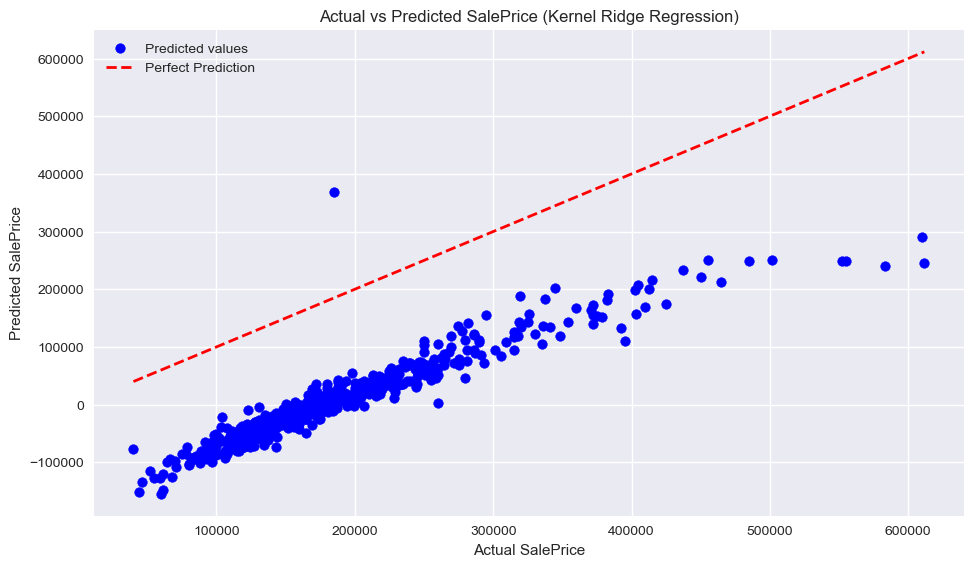

In [57]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, kernel_ridge_predictions, color='blue', label='Predicted values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice (Kernel Ridge Regression)')
plt.legend()
plt.show()


Majority of the blue dots (representing predicted values) are below the dashed line (representing perfect predictions), it indicates that the model is underpredicting. Underprediction means that the model's predicted values are lower than the actual values.



## C) Kernel Ridge Regression Equation

Unfortunately, it is not possible to write the Kernel Ridge Regression equation because it doesn't have a simple linear form like in  linear regression. Kernel Ridge Regression is a non-linear regression method that utilizes kenrnel functions to map the feature unto a higher dimensional plane where also a linear model is applied. This in turn makes it not possible to represent the regression equation in a straightforward manner.